In [14]:
import tensorflow as tf
import numpy as np
import keras
from keras import regularizers

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D
from sklearn.model_selection import train_test_split

import pickle
import time
import matplotlib.pyplot as plt

from tensorflow.keras.callbacks import TensorBoard
import os
os.environ["CUDA_VISIBLE_DEVICES"] = '0' #use GPU with ID=0
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5 # maximun alloc gpu50% of MEM
config.gpu_options.allow_growth = True #allocate dynamically
sess = tf.Session(config = config)

NAME="Nepali-cnn-model1-{}".format(int(time.time()))
tensorboard= TensorBoard(log_dir='logs/{}'.format(NAME),write_images=True)





X=pickle.load(open("X_nepali.pickle","rb"))
y=pickle.load(open("y_nepali.pickle","rb"))
print(X.shape)



(25824, 36, 36, 1)


In [15]:
 #normalization already done
print(X.shape[1:])
#X=np.array(X)
#X_final=X.reshape(20,20)

# one-hot encoding using keras' numpy-related utilities
n_classes=58
print("Shape before one-hot encoding: ", y.shape)
Y = keras.utils.to_categorical(y, n_classes)
#Y_test = keras.utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y.shape)
X_train,X_test,y_train,y_test=train_test_split(X,Y,stratify=Y,test_size=0.25)


(36, 36, 1)
Shape before one-hot encoding:  (25824,)
Shape after one-hot encoding:  (25824, 58)


In [16]:
layer_size=82

model= Sequential()
#64 denotes the number of filters and (3,3) denotes the window size
model.add(Conv2D(layer_size,(3,3),input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(layer_size,(5,5)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3)))

model.add(Flatten())
model.add(Dense(160, activation='relu',kernel_regularizer=regularizers.l2(0.003)))
model.add(Dropout(0.2))


model.add(Dense(58))
model.add(Activation('softmax'))

In [17]:
model.compile(loss="categorical_crossentropy",optimizer='adam',metrics=['accuracy'])


In [18]:
history=model.fit(X_train,y_train,batch_size=32,validation_data=(X_test, y_test),epochs=20, callbacks=[tensorboard])


Train on 19368 samples, validate on 6456 samples
Epoch 1/20
19368/19368 [==============================] - 11s 551us/step - loss: 1.7292 - acc: 0.5973 - val_loss: 0.6477 - val_acc: 0.8597
Epoch 2/20
19368/19368 [==============================] - 10s 528us/step - loss: 0.6715 - acc: 0.8515 - val_loss: 0.4783 - val_acc: 0.9136
Epoch 3/20
19368/19368 [==============================] - 10s 520us/step - loss: 0.5101 - acc: 0.8944 - val_loss: 0.4102 - val_acc: 0.9305
Epoch 4/20
19368/19368 [==============================] - 10s 525us/step - loss: 0.4377 - acc: 0.9186 - val_loss: 0.3720 - val_acc: 0.9442
Epoch 5/20
19368/19368 [==============================] - 10s 528us/step - loss: 0.3982 - acc: 0.9283 - val_loss: 0.3433 - val_acc: 0.9503
Epoch 6/20
19368/19368 [==============================] - 10s 521us/step - loss: 0.3625 - acc: 0.9376 - val_loss: 0.3612 - val_acc: 0.9463
Epoch 7/20
19368/19368 [==============================] - 10s 526us/step - loss: 0.3486 - acc: 0.9409 - val_loss: 0.3

Saved trained model at D:/ML/nepali_cnn_model\cnn.h5 


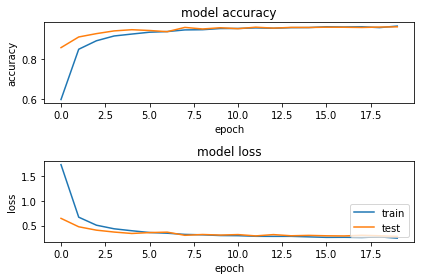

In [19]:


# saving the model
save_dir = "D:/ML/nepali_cnn_model"
model_name = 'cnn.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)


# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

fig
plt.legend(['train', 'test'], loc='lower right')
